In [1]:
# Predict-Stock-Prices-With-Python-and-Scikit-Learn-Dataquest

# Predict Stock Prices With Python and Scikit-Learn: Machine Learning Project

# Playlist Title - Dataquest Project Walkthroughs

# Playlist Link - <https://youtube.com/playlist?list=PL6UJrXaOPPcEesMFPaieQJwnBvKiRH2tT>

# Channel Name - Dataquest

# Channel Link - <https://www.youtube.com/c/Dataquestio>

# 1. Downloading Stock Data

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
# importing libraries
import yfinance as yf
import os

In [3]:
msft = yf.Ticker('MSFT')
msft_hist = msft.history(period='max')

In [4]:
msft_hist[:5]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055536,0.063703,0.055536,0.060980,1031788800,0.0,0.0
1986-03-14,0.060980,0.064247,0.060980,0.063158,308160000,0.0,0.0
1986-03-17,0.063158,0.064792,0.063158,0.064247,133171200,0.0,0.0
1986-03-18,0.064247,0.064792,0.062069,0.062613,67766400,0.0,0.0
1986-03-19,0.062613,0.063158,0.060980,0.061524,47894400,0.0,0.0


In [5]:
type(msft_hist)

pandas.core.frame.DataFrame

In [6]:
msft_hist.shape

(9208, 7)

In [7]:
msft_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9208 entries, 1986-03-13 to 2022-09-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          9208 non-null   float64
 1   High          9208 non-null   float64
 2   Low           9208 non-null   float64
 3   Close         9208 non-null   float64
 4   Volume        9208 non-null   int64  
 5   Dividends     9208 non-null   float64
 6   Stock Splits  9208 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 575.5 KB


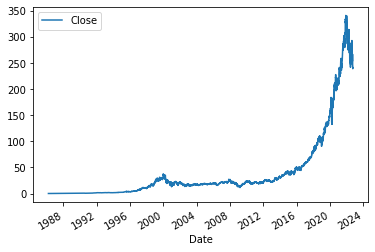

In [8]:
msft_hist.plot.line(y='Close', use_index=True)

# 2. Preparing the Data for Machine Learning

In [9]:
data= msft_hist[['Close']]
data=data.rename(columns={'Close':'Actual_Close'})
data['Target'] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])['Close']

In [10]:
data.head()

,Actual_Close,Target
Date,,
1986-03-13,0.060980,NaN
1986-03-14,0.063158,1.0
1986-03-17,0.064247,1.0
1986-03-18,0.062613,0.0
1986-03-19,0.061524,0.0


In [11]:
msft_prev = msft_hist.copy()

In [12]:
msft_prev = msft_prev.shift(1) # shifting the data by 1 day because we are using today's data to predict what will be the price tomorrow or using yesterday's data to predict today.

In [13]:
msft_prev.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14,0.055536,0.063703,0.055536,0.060980,1.031789e+09,0.0,0.0
1986-03-17,0.060980,0.064247,0.060980,0.063158,3.081600e+08,0.0,0.0
1986-03-18,0.063158,0.064792,0.063158,0.064247,1.331712e+08,0.0,0.0
1986-03-19,0.064247,0.064792,0.062069,0.062613,6.776640e+07,0.0,0.0


In [14]:
predictors = ['Close', 'High', 'Low', 'Open', 'Volume'] # clolumns used to make predictions
data = data.join(msft_prev[predictors]).iloc[1:]

In [15]:
data.head()

,Actual_Close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
1986-03-14,0.063158,1.0,0.060980,0.063703,0.055536,0.055536,1.031789e+09
1986-03-17,0.064247,1.0,0.063158,0.064247,0.060980,0.060980,3.081600e+08
1986-03-18,0.062613,0.0,0.064247,0.064792,0.063158,0.063158,1.331712e+08
1986-03-19,0.061524,0.0,0.062613,0.064792,0.062069,0.064247,6.776640e+07
1986-03-20,0.059891,0.0,0.061524,0.063158,0.060980,0.062613,4.789440e+07


# 3. Training A Machine Learning Model

In [16]:
!pip install scikit-learn # always install the library using scikit-learn, but import it using import sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from sklearn.ensemble import RandomForestClassifier # good classifier as it can identify non-linear relations in the data

In [18]:
# initializing the model
model = RandomForestClassifier(n_estimators=100, min_samples_split=300, random_state=42)

In [19]:
# training the model
train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train['Target']) # X & y

RandomForestClassifier(min_samples_split=300, random_state=42)

In [20]:
from sklearn.metrics import precision_score # identifying the score for how much false_positives the model gives while predicting

In [21]:
preds = model.predict(test[predictors])
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
import pandas as pd

# turning the predicted calues into a Pandas Series
preds = pd.Series(preds, index=test.index)
preds.head()

Date
2022-05-02    1.0
2022-05-03    1.0
2022-05-04    1.0
2022-05-05    1.0
2022-05-06    1.0
dtype: float64

In [23]:
precision_score(test['Target'], preds)

0.4725274725274725

In [24]:
combined = pd.concat({'Target': test['Target'], 'Predictions': preds}, axis=1)
combined.head()

,Target,Predictions
Date,,
2022-05-02,1.0,1.0
2022-05-03,0.0,1.0
2022-05-04,1.0,1.0
2022-05-05,0.0,1.0
2022-05-06,0.0,1.0


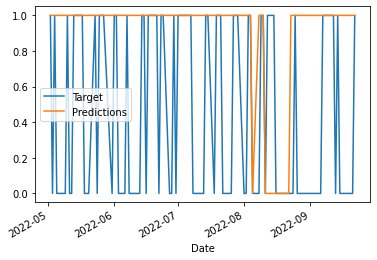

In [25]:
combined.plot()

# 4. Creating a Backtesting Engine

In [64]:
# backtesting -> using past data t predict future data (in batches)
# backtesting involves lopping the data, splitting the data into batches, and then training the model to predict the next batch of data along with the previous data

start = 1000
step = 750 # lesser steps the better # maybe 100 ?

def backtest(data, model, predictors, start=1000, step=750, threshold=0.6):
  predictions = []
  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()

    model.fit(train[predictors], train['Target'])

    preds = model.predict_proba(test[predictors])[:, 1] # we only need the second column of the probabilities i.e. Whether the stock price will rise or not
    preds = pd.Series(preds, index=test.index) # because it is default as numpy array
    preds[preds > threshold] = 1
    preds[preds <= threshold] = 0

    combined = pd.concat({"Target": test['Target'], 'Predictions': preds}, axis=1)
    predictions.append(combined)

  predictions = pd.concat(predictions)
  return predictions

In [42]:
predictions = backtest(data, model, predictors)
print(predictions)

            Target  Predictions
Date                           
1990-02-27     0.0          1.0
1990-02-28     1.0          1.0
1990-03-01     1.0          0.0
1990-03-02     1.0          1.0
1990-03-05     1.0          1.0
...            ...          ...
2022-09-16     0.0          0.0
2022-09-19     0.0          0.0
2022-09-20     0.0          0.0
2022-09-21     0.0          0.0
2022-09-22     1.0          0.0

[8207 rows x 2 columns]


In [43]:
predictions['Predictions'].value_counts()

0.0    7625
1.0     582
Name: Predictions, dtype: int64

# 5. Improving the Accuracy of the Model


In [44]:
precision_score(predictions['Target'], predictions['Predictions'])

0.4948453608247423

In [51]:
# sone useful trends
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()

weekly_trend = data.shift(1).rolling(7).mean()['Target'] # says what % price would go up based on he average of the past 7 days

In [52]:
# these data which come from the available data themselves,
# enable the model to know the historical data during training phase & testing phase too
# And it helps the model to know what today 

data_updated = data.copy()
data_updated['weekly_mean'] = weekly_mean['Close'] / data_updated['Close']
data_updated['quarterly_mean'] = quarterly_mean['Close'] / data_updated['Close']
data_updated['annual_mean'] = annual_mean['Close'] / data_updated['Close']

data_updated['annual_weekly_mean'] = data_updated['annual_mean'] / data_updated['weekly_mean']
data_updated['annual_quarterly_mean'] = data_updated['annual_mean'] / data_updated['quarterly_mean']
data_updated['weekly_trend'] = weekly_trend

data_updated['open_close_ratio'] = data_updated['Open'] / data_updated['Close']
data_updated['high_close_ratio'] = data_updated['High'] / data_updated['Close']
data_updated['low_close_ratio'] = data_updated['Low'] / data_updated['Close']

full_predictors = predictors + ['weekly_mean', 'quarterly_mean', 'annual_mean', 'annual_weekly_mean', 
                                'annual_quarterly_mean', 'weekly_trend', 'open_close_ratio',
                                'high_close_ratio', 'low_close_ratio']

print(data_updated)

            Actual_Close  Target       Close        High         Low  \
Date                                                                   
1986-03-14      0.063158     1.0    0.060980    0.063703    0.055536   
1986-03-17      0.064247     1.0    0.063158    0.064247    0.060980   
1986-03-18      0.062613     0.0    0.064247    0.064792    0.063158   
1986-03-19      0.061524     0.0    0.062613    0.064792    0.062069   
1986-03-20      0.059891     0.0    0.061524    0.063158    0.060980   
...                  ...     ...         ...         ...         ...   
2022-09-16    244.740005     0.0  245.380005  251.399994  244.020004   
2022-09-19    244.520004     0.0  244.740005  245.300003  242.059998   
2022-09-20    242.449997     0.0  244.520004  245.139999  240.850006   
2022-09-21    238.949997     0.0  242.449997  243.509995  239.639999   
2022-09-22    240.979996     1.0  238.949997  247.660004  238.899994   

                  Open        Volume  weekly_mean  quarterly_me

In [53]:
data_updated.isna().sum()

Actual_Close               0
Target                     0
Close                      0
High                       0
Low                        0
Open                       0
Volume                     0
weekly_mean                6
quarterly_mean            89
annual_mean              364
annual_weekly_mean       364
annual_quarterly_mean    364
weekly_trend               7
open_close_ratio           0
high_close_ratio           0
low_close_ratio            0
dtype: int64

In [55]:
# altogether 364 rows have na values because the highest rolling average was for 365 days for annual mean.
# we can drop these first 364 rows and conitue with the rest
data_filtered = data_updated.dropna()
data_filtered.isna().sum()

Actual_Close             0
Target                   0
Close                    0
High                     0
Low                      0
Open                     0
Volume                   0
weekly_mean              0
quarterly_mean           0
annual_mean              0
annual_weekly_mean       0
annual_quarterly_mean    0
weekly_trend             0
open_close_ratio         0
high_close_ratio         0
low_close_ratio          0
dtype: int64

In [56]:
# backtesting the entire dataset
predictions = backtest(data_filtered, model, full_predictors, step=100)

In [57]:
precision_score(predictions['Target'], predictions['Predictions'])

0.6277372262773723

In [58]:
# lets see the days when we would trade based on the model
predictions['Predictions'].value_counts()

0.0    7569
1.0     274
Name: Predictions, dtype: int64